In [2]:
import pandas as pd
import networkx as nx

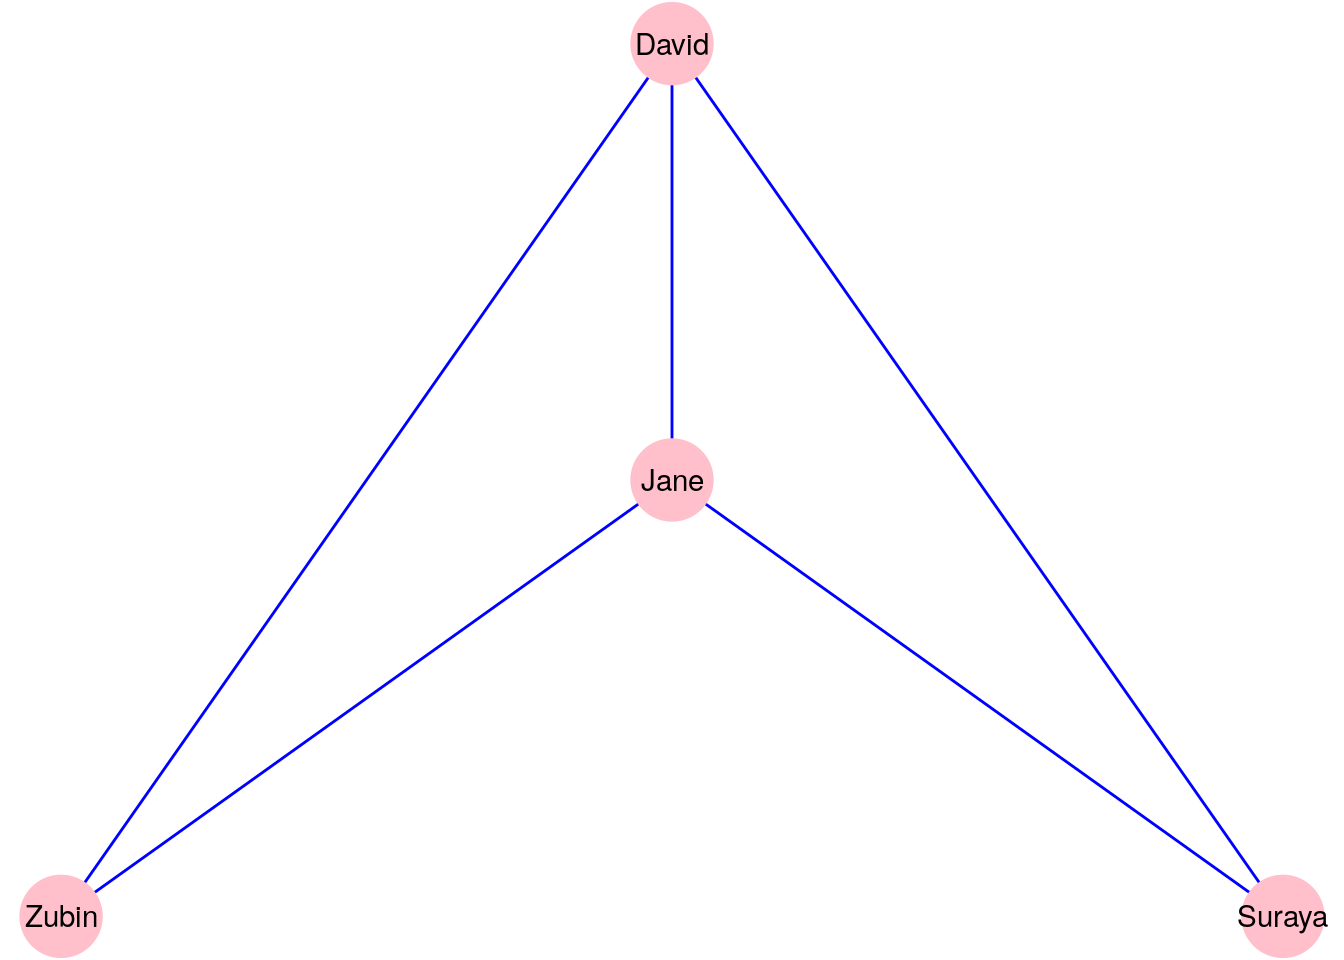

In [ ]:
# undirected graph

# create edgelist as dict
gwork_edgelist = dict(
    David = ['Zubin', 'Suraya', 'Jane'],
    Jane = ['Zubin', 'Suraya']
)

# create graph dict
gwork = nx.Graph(gwork_edgelist)

In [ ]:
list(gwork.nodes)

['David', 'Jane', 'Zubin', 'Suraya']

In [ ]:
list(gwork.edges)

[('David', 'Zubin'),
 ('David', 'Suraya'),
 ('David', 'Jane'),
 ('Jane', 'Zubin'),
 ('Jane', 'Suraya')]

In [ ]:
gwork.is_directed()

False

In [ ]:
# graph from pandas dataframe

gwork_edgelist=dict(
  source=["David", "David", "David", "Jane", "Jane"],
  target=["Zubin", "Suraya", "Jane", "Zubin", "Suraya"]
)

#create edgelist as Pandas DataFrame
gwork_edgelist = pd.DataFrame(gwork_edgelist)

# create graph from Pandas DataFrame
gwork = nx.from_pandas_edgelist(gwork_edgelist)

In [ ]:
gwork.is_directed()

False

In [ ]:
gwork.is_multigraph()
# multigraph = graph with more than one edges between two vertices

False

In [ ]:
# create directed graph

gmanage_edgelist=dict(
  David=["Zubin", "Jane"],
  Suraya=["David"]
)

# create directed graph
gmanage=nx.DiGraph(gmanage_edgelist)

# check edges
list(gmanage.edges)

[('David', 'Zubin'), ('David', 'Jane'), ('Suraya', 'David')]

In [ ]:
gmanage.is_directed()

True

# Generating Multigraph from Adjacency Matrix

An adjacency matrix is a square matrix with the vertices indexing the rows and columns, and where the 
(
i
,
j
)
-th entry of the matrix represents the number of edges from vertex 
i
 to vertex 
j
. 

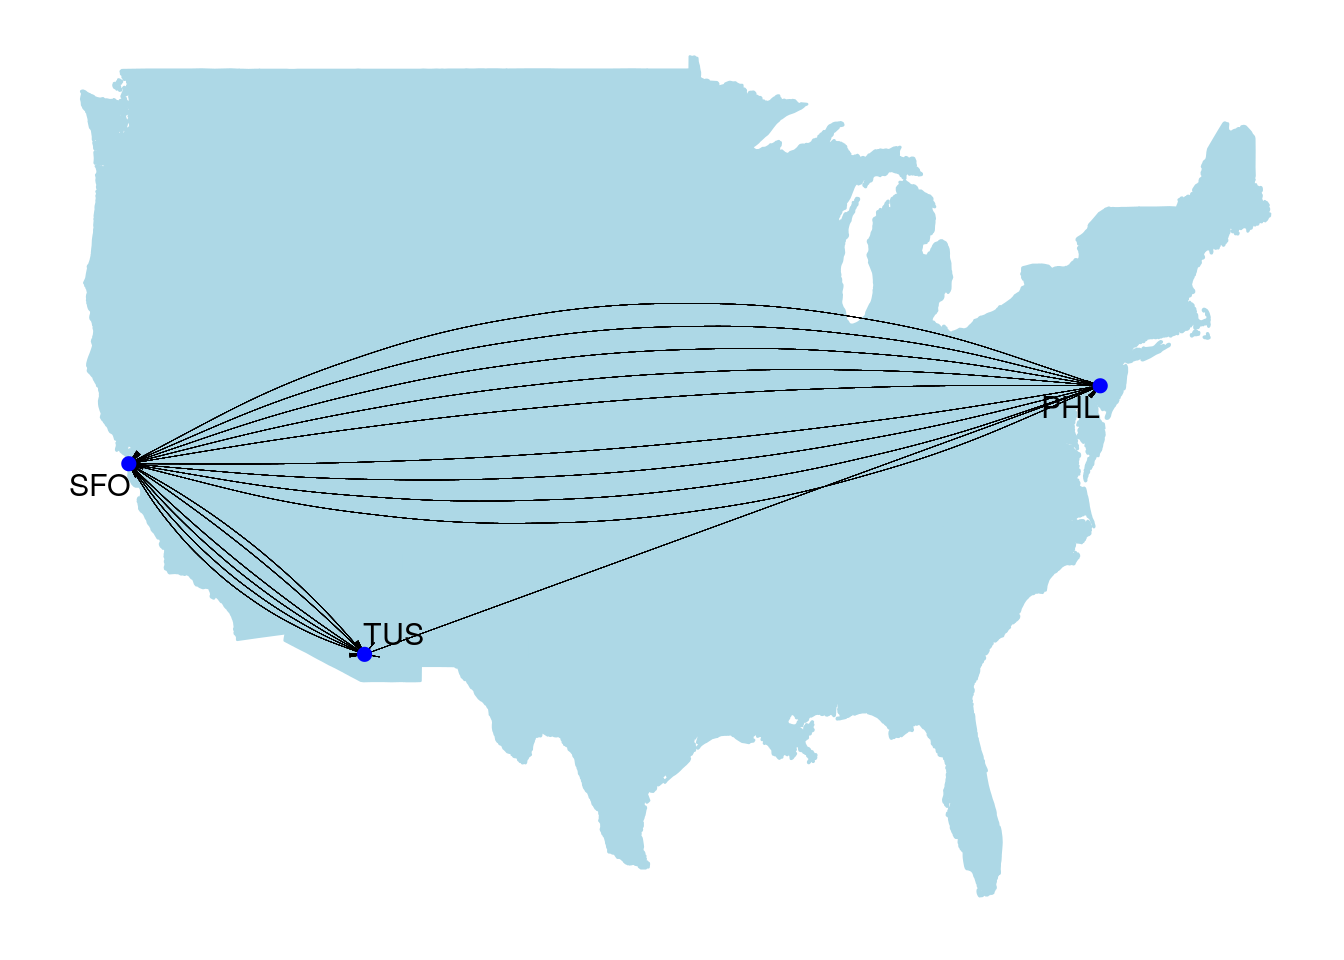

\begin{array}{cccc}
      & \mathrm{SFO} & \mathrm{PHL} & \mathrm{TUS} \\
      \mathrm{SFO} & . & 4 & 4 \\
      \mathrm{PHL} & 5 & . & 1  \\
      \mathrm{TUS} & 2 & . & .
\end{array}

In [6]:
np.reshape((0,4,4,5,0,1,2,0,0), (3,3))

array([[0, 4, 4],
       [5, 0, 1],
       [2, 0, 0]])

In [7]:
import numpy as np

# create adjacency matrix
adj_flights = np.reshape((0,4,4,5,0,1,2,0,0), (3,3))

# generate directed multigraph 
multiflights = nx.from_numpy_matrix(adj_flights, parallel_edges=True, create_using=nx.MultiDiGraph())

# name nodes
label_mapping = {0: "SFO", 1: "PHL", 2: "TUS"}
multiflights = nx.relabel_nodes(multiflights, label_mapping)

# check some edges
list(multiflights.edges)

[('SFO', 'PHL', 0),
 ('SFO', 'PHL', 1),
 ('SFO', 'PHL', 2),
 ('SFO', 'PHL', 3),
 ('SFO', 'TUS', 0),
 ('SFO', 'TUS', 1),
 ('SFO', 'TUS', 2),
 ('SFO', 'TUS', 3),
 ('PHL', 'SFO', 0),
 ('PHL', 'SFO', 1),
 ('PHL', 'SFO', 2),
 ('PHL', 'SFO', 3),
 ('PHL', 'SFO', 4),
 ('PHL', 'TUS', 0),
 ('TUS', 'SFO', 0),
 ('TUS', 'SFO', 1)]

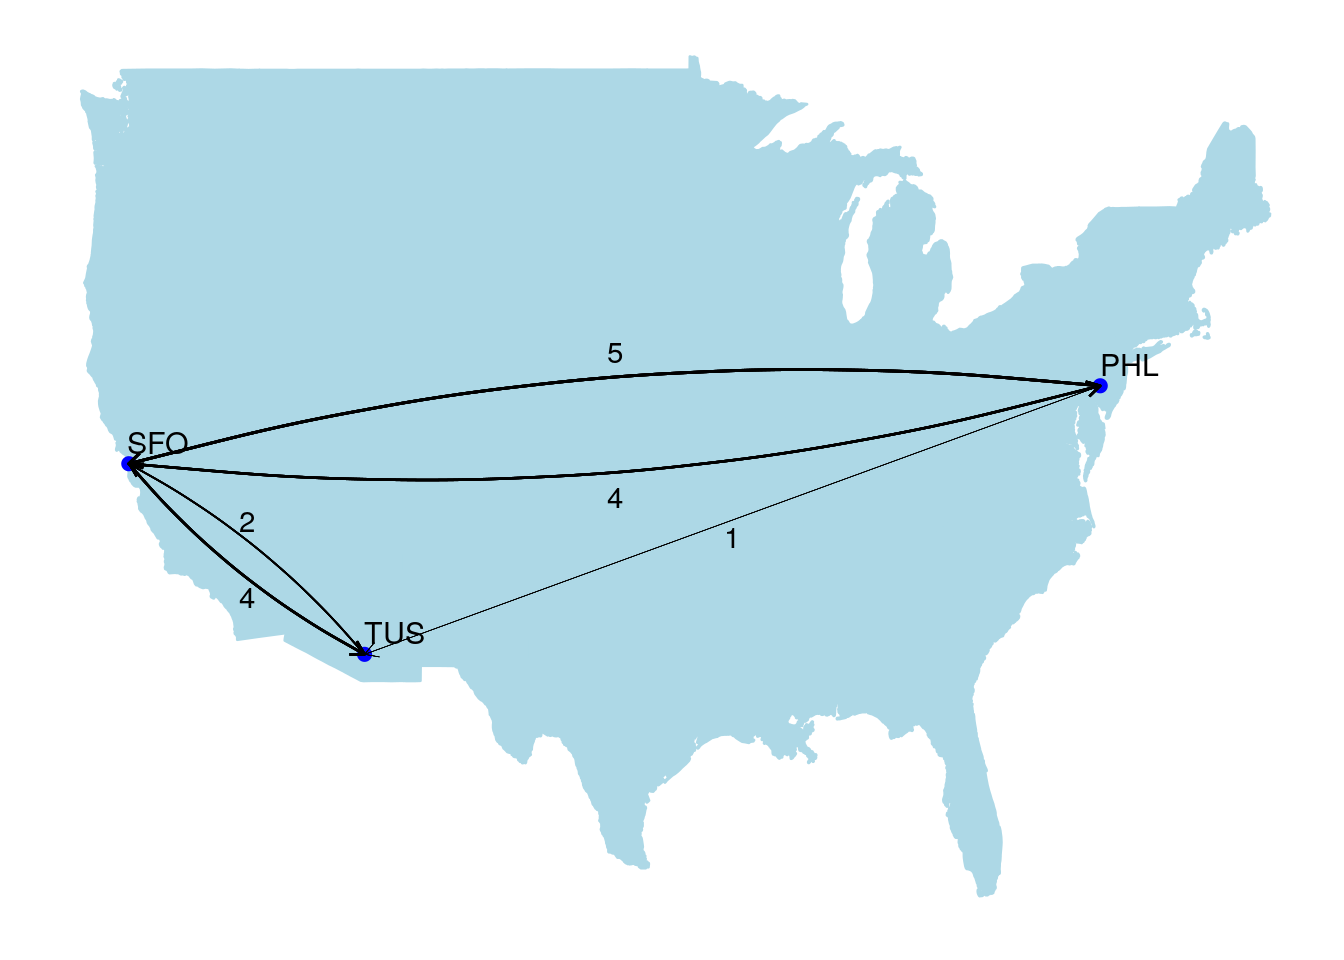

In [8]:
# graph with single weighted edges
multiflights = nx.from_numpy_matrix(adj_flights, parallel_edges=False, create_using=nx.DiGraph())

# name nodes
label_mapping = {0: "SFO", 1: "PHL", 2: "TUS"}
multiflights = nx.relabel_nodes(multiflights, label_mapping)

# check edges
list(multiflights.edges)

[('SFO', 'PHL'),
 ('SFO', 'TUS'),
 ('PHL', 'SFO'),
 ('PHL', 'TUS'),
 ('TUS', 'SFO')]

In [9]:
# check weights of edges
[multiflights.edges[i]['weight'] for i in list(multiflights.edges)]

[4, 4, 5, 1, 2]

## Add vertex and edge properties to a graph

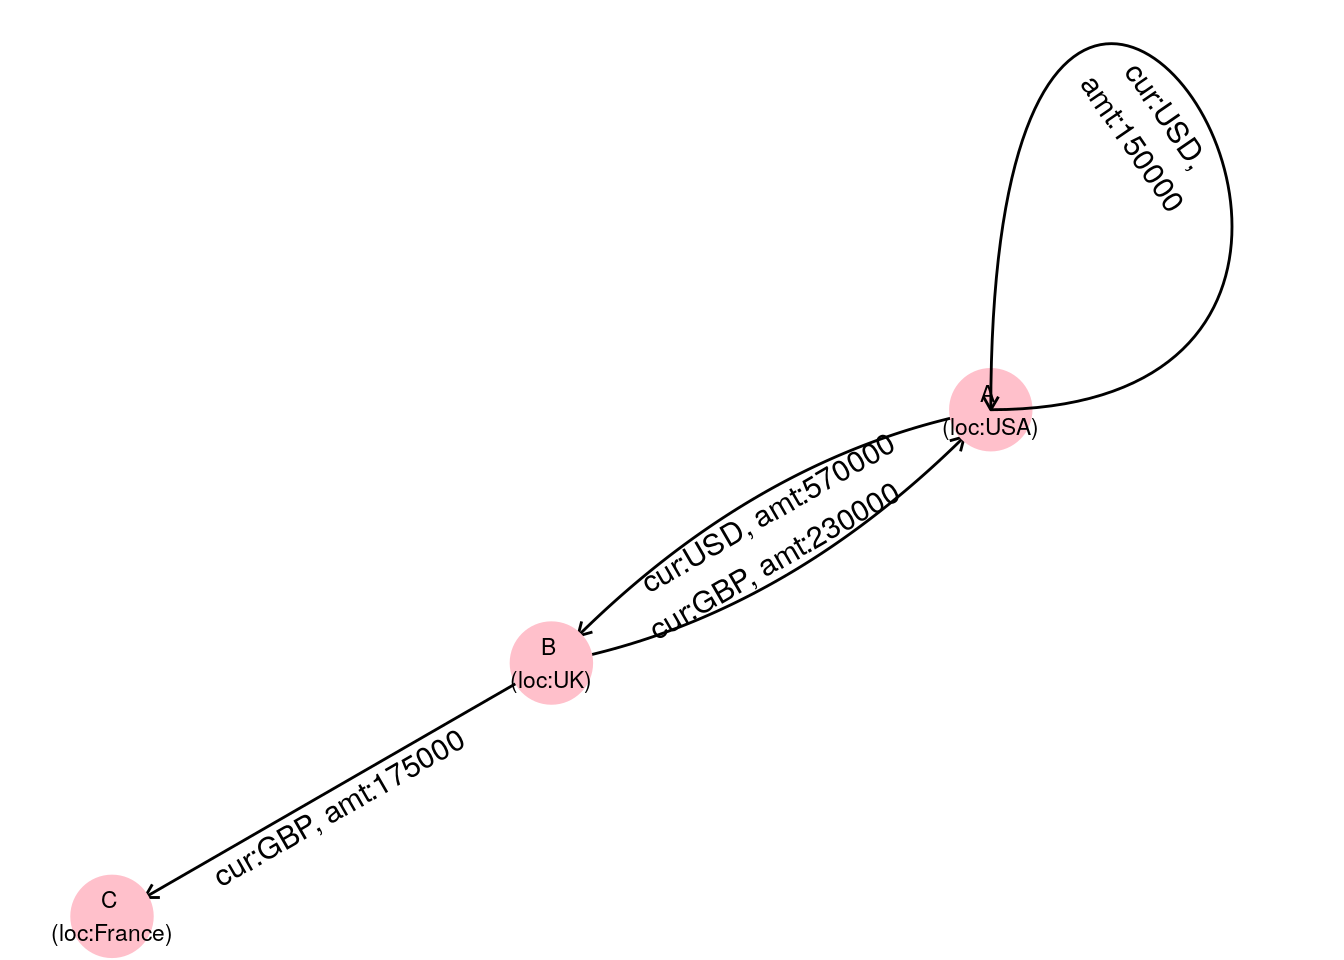

In [10]:
# create dict of edgelist
transfer_edgelist = dict(
  A = ["A", "B"],
  B = ["A", "C"]
)

# create directed graph
transfer=nx.DiGraph(transfer_edgelist)

# view vertices
list(transfer.nodes)

['A', 'B', 'C']

In [11]:
# add attribute loc to vertices
loc_attributes = dict(A = "USA", B = "UK", C = "France")
nx.set_node_attributes(G = transfer, name = "loc", values = loc_attributes)

# check 
[transfer.nodes[i]['loc'] for i in list(transfer.nodes)]

['USA', 'UK', 'France']

In [16]:
list(transfer.edges)

[('A', 'A'), ('A', 'B'), ('B', 'A'), ('B', 'C')]

In [17]:
# add attributes to edges
transfer_attributes = {
  ('A', 'A'): {"cur": "USD", "amt": 150000}, 
  ('A', 'B'): {"cur": "USD", "amt": 570000},
  ('B', 'A'): {"cur": "GBP", "amt": 230000}, 
  ('B', 'C'): {"cur": "GBP", "amt": 175000}
}

# set edge attributes
nx.set_edge_attributes(G = transfer, values = transfer_attributes)

# check
[transfer.edges[i]['cur'] for i in list(transfer.edges)]

['USD', 'USD', 'GBP', 'GBP']

In [18]:
[transfer.edges[i]['amt'] for i in list(transfer.edges)]

[150000, 570000, 230000, 175000]

#Data Exercise

## Ex. 1

In [19]:
# Create a graph object using this edgelist. Ensure that it is undirected.

import pandas as pd
import networkx as nx

koenigsberg = pd.read_csv("koenigsberg.csv")
koenigsberg

,from,to
0,Altstadt-Loebenicht,Kneiphof
1,Altstadt-Loebenicht,Kneiphof
2,Altstadt-Loebenicht,Lomse
3,Kneiphof,Lomse
4,Vorstadt-Haberberg,Lomse
5,Kneiphof,Vorstadt-Haberberg
6,Kneiphof,Vorstadt-Haberberg


In [21]:
# graph from pandas dataframe

koenigsberg.rename(columns={'from':'source', 'to':'target'}, inplace=True)
# create graph from Pandas DataFrame
g_koenigsberg = nx.from_pandas_edgelist(koenigsberg)

##Ex. 2 

In [29]:
# By exploring the graph object you just created, determine how many vertices and edges are in this graph. Does this make sense given the original problem tackled by Euler?

print(f"no. of vertices: {len(list(g_koenigsberg.nodes))}")
print(f"no. of edges: {len(list(g_koenigsberg.edges))}")

no. of vertices: 4
no. of edges: 5


##Ex. 3

In [30]:
# Obtain a list of the names of the vertices in this graph.

list(g_koenigsberg.nodes)

['Altstadt-Loebenicht', 'Kneiphof', 'Lomse', 'Vorstadt-Haberberg']

Ex. 4

In [36]:
# Find a function or method in your graph package to create the adjacency matrix or adjacency list for this graph. Check the output to see if it makes sense

print(nx.to_numpy_matrix(g_koenigsberg))

[[0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]]
